# codigo anteriror

In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

df1 = df_raw.copy()

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new

df1['date'] = pd.to_datetime(df1['date'])

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'] = df1['promo_interval'].fillna(0)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

# Verificação dos tipos de dados
df2 = df1.copy()
# year
#dt = data time . (oq eu quero )
df2['year'] = df2['date'].dt.year


#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week_of_year
df2['week_of_year'] = df2['date'].dt.week

#Year_week
#ano-semana do ano
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Competition_since
# Quanto tempo a partir da compra até a promoção
# Juntar competition month e year
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)

# Manter um mês
# Tempo que a competição começou em um mês
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)


#promo_since
#desde quando tem promoção ativa
#tenho o ano e a semana do ano 
# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30).apply( lambda x: x.days ).astype( int )
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days ).astype( int )
# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )


#state_holiday
#troca a sigla a,b,c por nome
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )
df3 = df2.copy()
df3
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]
cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop(cols_drop,axis=1)
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [2]:
num_attributes = df3.select_dtypes(include=['int64', 'float64'])
cat_attributes = df3.select_dtypes(exclude=['int64','float64','datetime64[ns]'])


# modelagem dos dados para Algoritmo de machine learning

In [ ]:
CRISP - REVISÂO
--QUESTSAO DE NEGOCIO--
- FAZER PRECISAO DE VENDAS DAS PROXIMAS Y6 SEMANAS

COMO N SOU LOCO N SAI FAZENDO MAS QUIS ENTENDER OS MOTIVOS
--ENTENDIMENTO DO NEGOCIO--
CFO QUER SABER QUANTO VAI ENTRAR NOS PROXIMOS 6 MESES PARA FAZER INVESTIMENTO DAS LOJAS

--COLETA DOS DADOS--    
-FOI NO KAGGLE MAS NA VIDA REAL É NO SQL E FAZER O TABELAO

--LIMPEZA DOS DADOS--
- TIRAR NA , LIMPAR , DESCRIÇÃO ESTATISTICA(VISAO GERAL)
-DERIVAR FEATURES
-SELEÇÃO DAS FEATURE



--EXPLORAÇÃO DOS DADOS--
-ANALISE VARIADA, BIVARIADA,MULTIVARIADA
VALIDAR HIPOTESES E VER QUAIS VARIAVEIS VAO SER IMPORTATNTE NO MODELO
GERAÇÃO DE INSIGHT

--MODELAGEM DOS DADOS--
PREPARAR OS DADOS PRO MACHINE LEARNING



In [ ]:
MOTIVAÇÃO PARA FAZER A MODELAGEM : O APRENDIZADO DA MAIORIA DOS ALGORTIMOS DE MLK É FACILITADO COM DADOS
NUMERICOS,E NA MESMA ESCALA

In [ ]:
UM DOS PROBLEMAS

ML NAO CONSIGO USAR OS DADOS CATEGORICOS
ENTÃO VOU TER QUE TRASNFORMAR OS DADOS CATEGORICOS EM NUMERICOS SEM PERDE INFORMAÇÃO
ESSA TRASNFORMAÇÃO É O ENCONDING

In [ ]:
SEGUNDO PROBLEMA
RANGE DA DAY_OF_WEEK E COMPETITION_DISTANCE TEM UM RANGE MUITO DIFERENTE 
DAY_OF_WEEK = 6
COMPETITION_DISTANCE = 200000


NO ML ELE VALORIZA BENEFICIAM AS VARIAVEL COM MAIOR RANGE (ENVIESIA O MODELO)
ENTAO PARA SER JUSTO PRECISA NORMALIZAR PRECISO INDICAR QUE NENHUMA VARIAVEL A MAIS VALORIZADA QUE A OUTRA


In [ ]:
COMO PREPARAR OS DADOS ?

-NORMALIZAÇÃO
RESCALA O CENTRO PARA 0 COM DESVIO PADRAO IGUAL A 0
-DISTRIBUIÇÃO NORMAL



    
-RECALING
RESCALA PARA INTEVALO ENTRE 0 E 1 
DISTRIBUIÇÃO NAO NORMAL



    
-TRASNFORMAÇÃO
CONVERSAO DE FEATTURE CAREGORICA PARA NUMERICA(ENCONDING)
-TRASNFORMAÇÃO DE NATUREZA(MESES 1A12 DEIXAR CICLICO)

# NORMALIZAÇÃO

In [ ]:
normalização = variavel - media / desvpadra

FAZER A MEDIA
FAZER DP
FAZER ISSO EM TODOS OS VALORES DA COLUNA
COLOCAR NOVO VALOR NORMALIZADO
PACOTE DO SKITLEARN FAZ ISSO DIRETO

In [23]:
df4 = df3.copy()

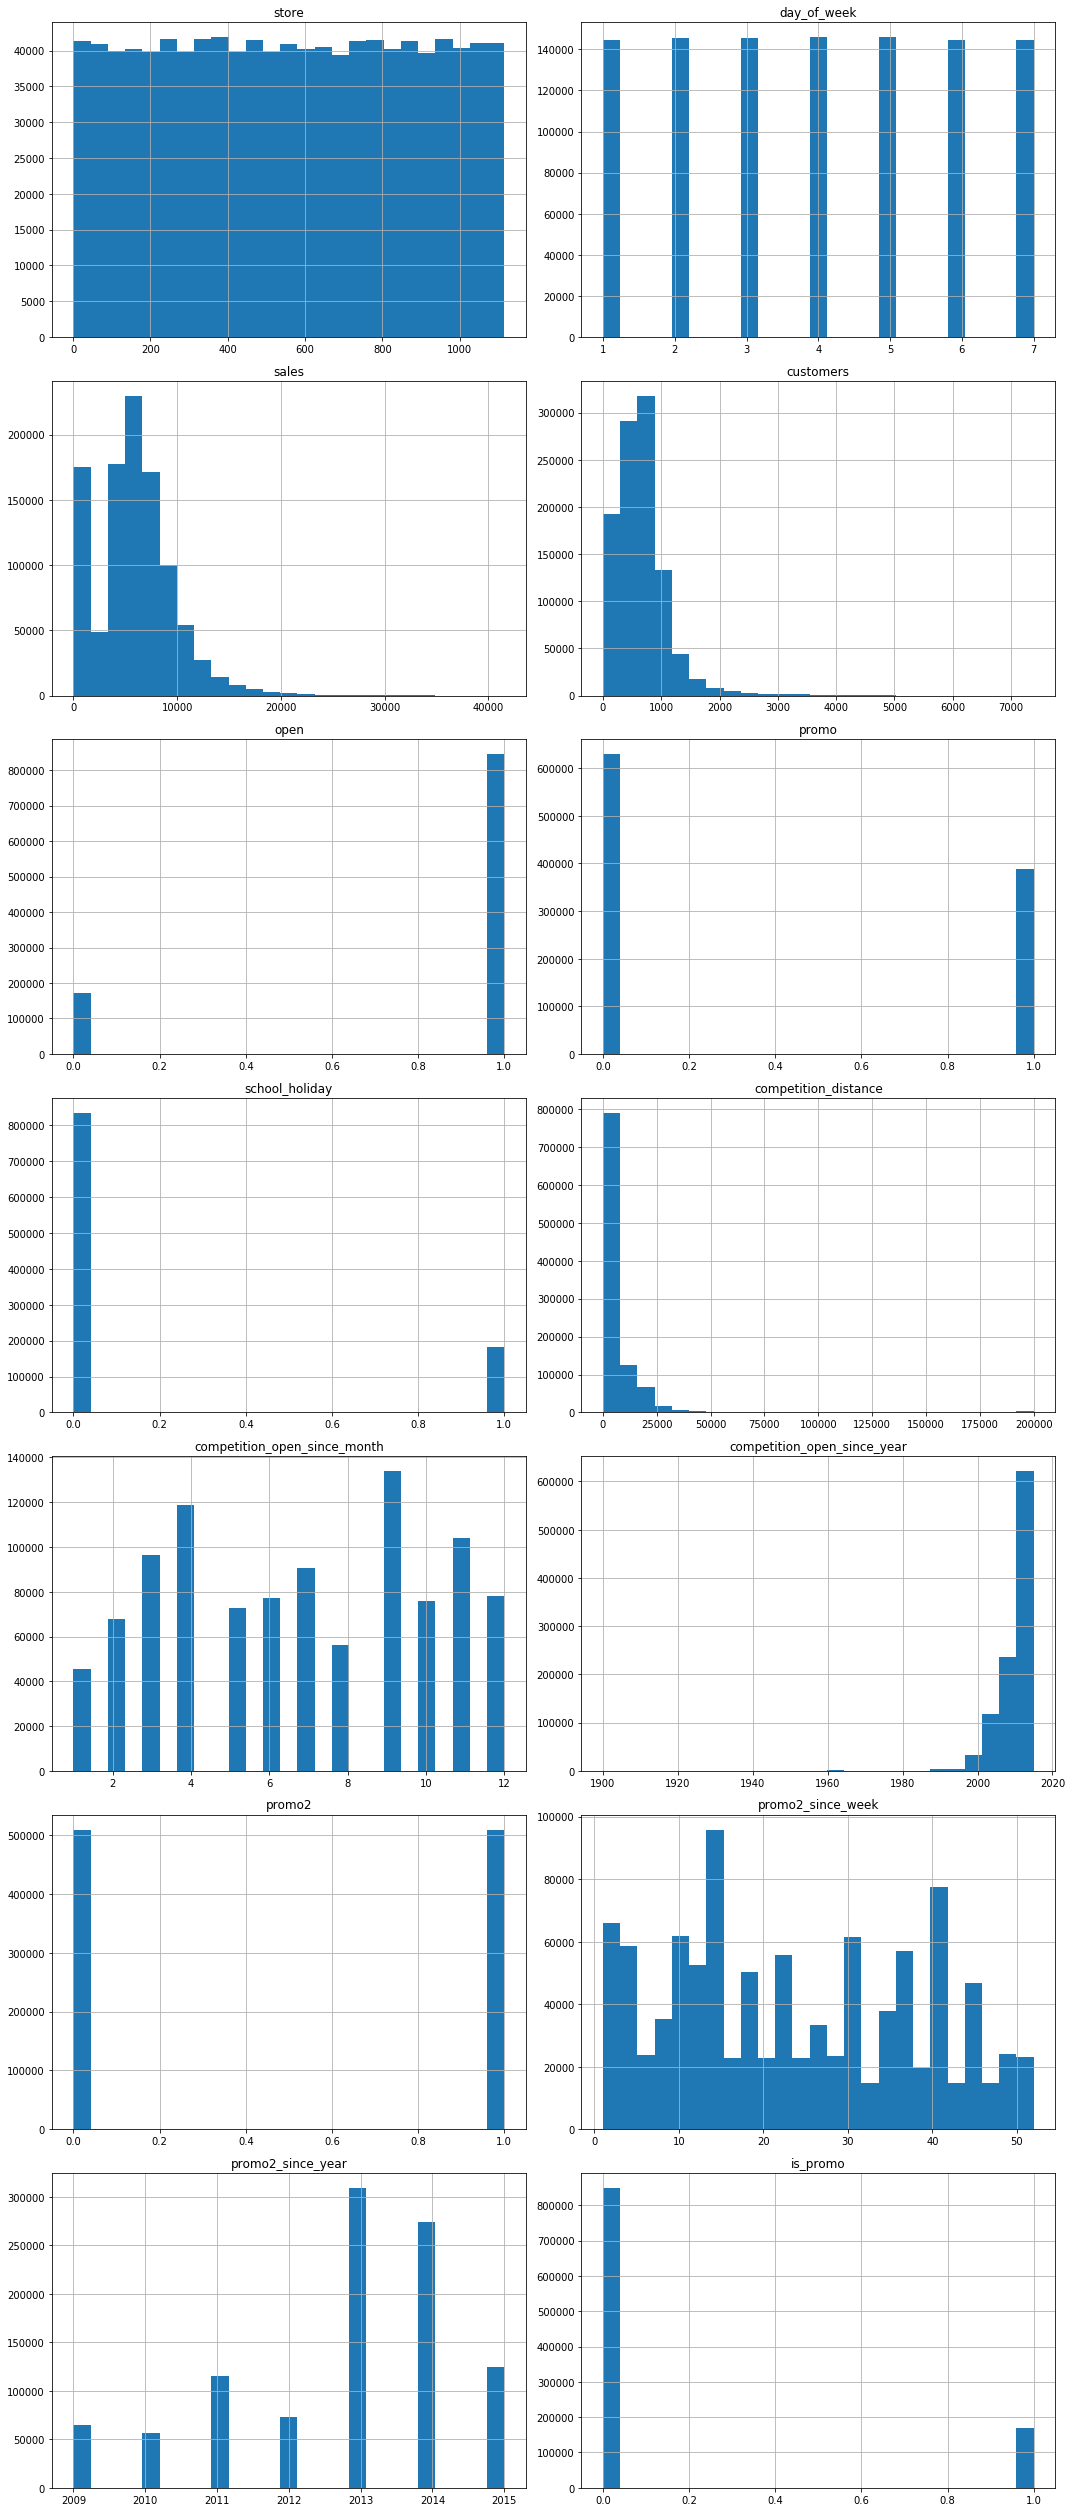

In [24]:
num_attributes = df1.select_dtypes(include=['int64','float64'])

import matplotlib.pyplot as plt

# Seleciona apenas as colunas numéricas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# Define o número de colunas por linha no layout
cols_per_row = 2

# Calcula o número de linhas e colunas necessárias para acomodar todos os subplots
num_cols = len(num_attributes.columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

# Define o tamanho da figura
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Plota os histogramas
for i, column in enumerate(num_attributes.columns):
    ax = axes[i // cols_per_row, i % cols_per_row]  # Seleciona o subplot correto
    num_attributes[column].hist(bins=25, ax=ax)
    ax.set_title(column)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Mostra o gráfico
plt.show()


In [ ]:
nenhuma destribuição normal , nao vamos normalizar nada

# RESCALING

In [ ]:
min-max-scaler = variavel - media / xmax-xmin
resultado dessa conta é o novo valor
- usar em categorias nao normal
-sensivel a outlier

entao existe o ROBUST SCALER
variavel nova = variavel - Q1/Q3-Q1

- usa os quartil para minimizar erros dos outliers



utilizar o min max e nos que tem outlier usar o robust

In [7]:
aux1 = df4.select_dtypes(include = ['int64','float64'])
aux1

,store,day_of_week,sales,promo,school_holiday,store_type,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,competition_time_month,promo_time_week
0,1,5,5263,1,1,2,1270.0,9,2008,0,31,2015,0,2015,7,31,31,84,0
1,2,5,6064,1,1,0,570.0,11,2007,1,13,2010,1,2015,7,31,31,94,279
2,3,5,8314,1,1,0,14130.0,12,2006,1,14,2011,1,2015,7,31,31,105,226
3,4,5,13995,1,1,2,620.0,9,2009,0,31,2015,0,2015,7,31,31,71,0
4,5,5,4822,1,1,0,29910.0,4,2015,0,31,2015,0,2015,7,31,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,3375,0,1,1,150.0,9,2006,0,1,2013,0,2013,1,1,1,77,0
1016827,733,2,10765,0,1,1,860.0,10,1999,0,1,2013,0,2013,1,1,1,161,0
1016863,769,2,5035,0,1,1,840.0,1,2013,1,48,2012,1,2013,1,1,1,0,6
1017042,948,2,4491,0,1,1,1430.0,1,2013,0,1,2013,0,2013,1,1,1,0,0


In [25]:
#competition distance
#muito outlier usar a robust invez da minmax
from sklearn.preprocessing import RobustScaler,MinMaxScaler
rs = RobustScaler()
#vai encontrar quartil 1 e 3 da formula e calcular o valor
df4['competition_distance'] = rs.fit_transform(df4[['competition_distance']].values)





#competition time month
#bsatante outlier usar o robust tbm
rs1 = RobustScaler()
df4['competition_time_month'] = rs1.fit_transform(df4[['competition_time_month']].values)





#pormo time week
#nao tem muito outlier usar o minmaxscaller(se der ruim mudar no proximo crisp)
mms = MinMaxScaler()
df4['promo_time_week'] = mms.fit_transform(df4[['promo_time_week']].values)



#year
mms1 = MinMaxScaler()
df4['year'] = mms1.fit_transform(df4[['year']].values)





#boxplot de todas pra ve se tem outlier

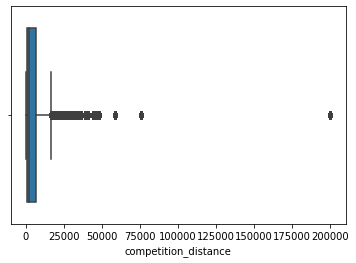

In [16]:
sns.boxplot(df4['competition_distance'])

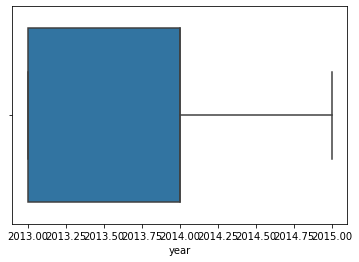

In [15]:
sns.boxplot(df4['year'])

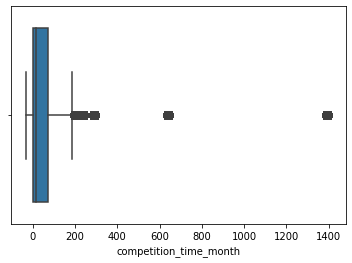

In [14]:
sns.boxplot(df4['competition_time_month'])

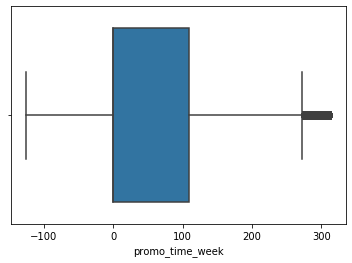

In [13]:
sns.boxplot(df4['promo_time_week'])

# TRASNFORMAÇÃO

In [ ]:
separei essas pq sao ciclicas

#day_of week




#month




#day




#weekofyear

# Encondig

In [ ]:
# trasnformar as variaveis categoricas em nunericas

-one hot enconding
faz um novo dataset coloca 1 aonde for verdadeiro e 0 nos outros
- aumenta muito o dataset, possivel offerfit
- bom para usar em feriados

-label enconding
-trocas as categorias por numeros
-variavei que apenas nomes

    
-ordinal enconing
-tbm troca por numero
-mas segue uma hierarquia exemplo temperatura,altura,cor n

    
-target enconding
-mias de 100 categoricas
-média das vendas

    
-frequency enconding
-media de quanto aparece a variavel
-marcas de carro

    
-embedding enconding
-usa redes neurais
-


In [7]:
# temos 3 variaveis categóricas 
#state_holiday - one hot encoding
#cai trocar a variavel categorica por numerica
#colocar o dataset, o nome da nova coluna e a coluna que quero mduar
# one-hot encoding para 'state_holiday'
df4 = pd.get_dummies(df4, prefix=['state_holiday'], columns=['state_holiday'], dtype=int)
df4 = pd.get_dummies(df4, prefix=['state_holiday'], columns=['state_holiday'], dtype=int)

# store_type - label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4['store_type'] = le.fit_transform(df4['store_type'])

# assortment
assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
df4['assortment'] = df4['assortment'].map(assortment_dict)




In [8]:
df4

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,2,1,-0.170968,9,...,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,6064,1,1,0,1,-0.283871,11,...,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,8314,1,1,0,1,1.903226,12,...,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,13995,1,1,2,3,-0.275806,9,...,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,4822,1,1,0,1,4.448387,4,...,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,1,1,1,-0.351613,9,...,1,2013-00,2006-09-01,0.824324,2012-12-31,0.287016,0,0,1,0
1016827,733,2,2013-01-01,10765,0,1,1,2,-0.237097,10,...,1,2013-00,1999-10-01,1.959459,2012-12-31,0.287016,0,0,1,0
1016863,769,2,2013-01-01,5035,0,1,1,2,-0.240323,1,...,1,2013-00,2013-01-01,-0.216216,2012-11-19,0.300683,0,0,1,0
1017042,948,2,2013-01-01,4491,0,1,1,2,-0.145161,1,...,1,2013-00,2013-01-01,-0.216216,2012-12-31,0.287016,0,0,1,0


# Trasnformação de grandeza e natureza

In [ ]:
grandeza trazer a variavel para o estado mais proximo de uma normal 
-tem que fazer pq o algortimo segue premissa e uma das premissa é a variavel resposta ser normal
-aumentar a acuracia

natureza trazer a natureza real no conjunto de dados
-meses , 1 a 12 fazer com q seja ciclico que o mes 12 fique perto do 1

In [ ]:
logarithm trasnformation
aplicar log


box cox

cube root


In [11]:
#TRANSFORMAÇÃO de grandeza LOGARITMA NO SALES(VENDAS)

df4['sales'] = np.log1p(df4['sales'])

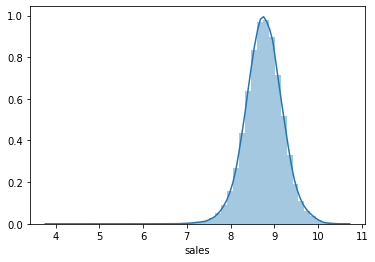

In [13]:
sns.distplot(df4['sales'])

In [26]:
# TRASNFORMAÇÃO DE NATUREZA
#month
df4['month_sin'] = df4['month'].apply(lambda x: np.sin(x * (2. * np.pi/12)))
df4['month_cos'] = df4['month'].apply(lambda x: np.cos(x *(2. * np.pi/12)))


#day
df4['month_sin'] = df4['day'].apply(lambda x: np.sin(x * (2. * np.pi/30)))
df4['month_cos'] = df4['day'].apply(lambda x: np.cos(x *(2. * np.pi/30)))

#week_of_year
df4['week_of_year_sin'] = df4['week_of_year'].apply(lambda x: np.sin(x * (2. * np.pi/52)))
df4['week_of_year_cos'] = df4['week_of_year'].apply(lambda x: np.cos(x *(2. * np.pi/52)))


#day_of_year
df4['day_of_week_sin'] = df4['day_of_week'].apply(lambda x: np.sin(x * (2. * np.pi/7)))
df4['day_of_week_cos'] = df4['day_of_week'].apply(lambda x: np.cos(x *(2. * np.pi/7)))

In [27]:
df4 - criou duas novas colunas da sin cos , que deixou elas ciclicas usa metódo de circulo trigonometrica

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,competition_since,competition_time_month,promo_since,promo_time_week,month_sin,month_cos,week_of_year_sin,week_of_year_cos,day_of_week_sin,day_of_week_cos
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,-0.170968,...,2008-09-01,0.918919,2015-07-27,0.287016,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,-0.283871,...,2007-11-01,1.054054,2010-03-22,0.922551,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,1.903226,...,2006-12-01,1.202703,2011-03-28,0.801822,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,-0.275806,...,2009-09-01,0.743243,2015-07-27,0.287016,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,4.448387,...,2015-04-01,-0.162162,2015-07-27,0.287016,0.207912,0.978148,-0.568065,-0.822984,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,-0.351613,...,2006-09-01,0.824324,2012-12-31,0.287016,0.207912,0.978148,0.120537,0.992709,0.974928,-0.222521
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,-0.237097,...,1999-10-01,1.959459,2012-12-31,0.287016,0.207912,0.978148,0.120537,0.992709,0.974928,-0.222521
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,-0.240323,...,2013-01-01,-0.216216,2012-11-19,0.300683,0.207912,0.978148,0.120537,0.992709,0.974928,-0.222521
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,-0.145161,...,2013-01-01,-0.216216,2012-12-31,0.287016,0.207912,0.978148,0.120537,0.992709,0.974928,-0.222521
